 # You can remove 17 columns at the Beginning!!

As the data is highly dimensional in this competition, it is really difficult to do even a little thing. So, before you begin any work, read this kernel and save your time!

I have tried to reduce the column dimension by eliminating less useful columns and selected 17 columns which you can remove just after loading the data sets.

* Selected `mostly-missing feaures` which have more than 99% of missing values.
* Selected `too-skewed features` whose majority categories cover more than 99% of occurences.
* Selected `hightly-correlated features`. Tested correlations between columns, picked up pairs whose corr is greater than 0.99, compared the distribution of the features in the pairs and corr with `HasDetections`,  and selected the minor column for elimination.

**You can eliminate 17 columns without worry:**
1. (M) PuaMode
1. (M) Census_ProcessorClass
1. (S) Census_IsWIMBootEnabled
1. (S) IsBeta
1. (S) Census_IsFlightsDisabled
1. (S) Census_IsFlightingInternal
1. (S) AutoSampleOptIn
1. (S) Census_ThresholdOptIn
1. (S) SMode
1. (S) Census_IsPortableOperatingSystem
1. (S) Census_DeviceFamily
1. (S) UacLuaenable
1. (S) Census_IsVirtualDevice
1. (C) Platform
1. (C) Census_OSSkuName
1. (C) Census_OSInstallLanguageIdentifier
1. (C) Processor

Here, (M) denotes `mostly-missing feaures`, (S) means  `too-skewed features`, and (C) indicates `hightly-correlated features`.



**Use this code:**

> remove_cols = ['PuaMode', 'Census_ProcessorClass', 'Census_IsWIMBootEnabled', 'IsBeta', 'Census_IsFlightsDisabled', 'Census_IsFlightingInternal', 'AutoSampleOptIn', 'Census_ThresholdOptIn', 'SMode', 'Census_IsPortableOperatingSystem',  'Census_DeviceFamily', 'UacLuaenable', 'Census_IsVirtualDevice', 'Platform', 'Census_OSSkuName', 'Census_OSInstallLanguageIdentifier', 'Processor']
>
> train.drop(remove_cols, axis=1, inplace=True)
>
> test.drop(remove_cols, axis=1, inplace=True)


## If you want to see how I got this:
In this kernel, I used only train dataset but the result was the same when I used train+test dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Data

In [2]:
# referred https://www.kaggle.com/theoviel/load-the-totality-of-the-data
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'UacLuaenable':                                         'float64', # was 'float32'
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', # was 'float16'
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }
train = pd.read_csv('../input/train.csv', dtype=dtypes)
train.shape

(8921483, 83)

In [3]:
droppable_features = []

# 2. Feature Engineering

## 2.1 mostly-missing Columns

In [4]:
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

PuaMode                                              0.999741
Census_ProcessorClass                                0.995894
DefaultBrowsersIdentifier                            0.951416
Census_IsFlightingInternal                           0.830440
Census_InternalBatteryType                           0.710468
Census_ThresholdOptIn                                0.635245
Census_IsWIMBootEnabled                              0.634390
SmartScreen                                          0.356108
OrganizationIdentifier                               0.308415
SMode                                                0.060277
CityIdentifier                                       0.036475
Wdft_IsGamer                                         0.034014
Wdft_RegionIdentifier                                0.034014
Census_InternalBatteryNumberOfCharges                0.030124
Census_FirmwareManufacturerIdentifier                0.020541
Census_IsFlightsDisabled                             0.017993
Census_F

* There are 2 columns which have more than 99% of missing values and they are useless.

In [5]:
droppable_features.append('PuaMode')
droppable_features.append('Census_ProcessorClass')

## 2.2 Too skewed columns

In [6]:
pd.options.display.float_format = '{:,.4f}'.format
sk_df = pd.DataFrame([{'column': c, 'uniq': train[c].nunique(), 'skewness': train[c].value_counts(normalize=True).values[0] * 100} for c in train.columns])
sk_df = sk_df.sort_values('skewness', ascending=False)
sk_df

,column,skewness,uniq
75,Census_IsWIMBootEnabled,100.0000,2
5,IsBeta,99.9992,2
69,Census_IsFlightsDisabled,99.9990,2
68,Census_IsFlightingInternal,99.9986,2
27,AutoSampleOptIn,99.9971,2
71,Census_ThresholdOptIn,99.9749,2
29,SMode,99.9537,2
65,Census_IsPortableOperatingSystem,99.9455,2
28,PuaMode,99.9134,2
35,Census_DeviceFamily,99.8383,3


* There are 12 categorical columns whose majority category covers more than 99% of occurences, and they are useless, too.

In [7]:
droppable_features.extend(sk_df[sk_df.skewness > 99].column.tolist())
droppable_features

['PuaMode',
 'Census_ProcessorClass',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'PuaMode',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice']

In [8]:
# PuaMode is duplicated in the two categories.
droppable_features.remove('PuaMode')

# Drop these columns.
train.drop(droppable_features, axis=1, inplace=True)

### Fill missing values for columns that have more than 10% of missing values

In [9]:
# Nan Values
null_counts = train.isnull().sum()
null_counts = null_counts / train.shape[0]
null_counts[null_counts > 0.1]

DefaultBrowsersIdentifier    0.9514
OrganizationIdentifier       0.3084
SmartScreen                  0.3561
Census_InternalBatteryType   0.7105
dtype: float64

### 4 columns above should be filled missing values.

In [10]:
train.DefaultBrowsersIdentifier.value_counts().head(5)

239.0000      46056
3,195.0000    42692
1,632.0000    28751
3,176.0000    24220
146.0000      20756
Name: DefaultBrowsersIdentifier, dtype: int64

Replace missing values with 0.

In [11]:
train.DefaultBrowsersIdentifier.fillna(0, inplace=True)

In [12]:
train.SmartScreen.value_counts()

RequireAdmin    4316183
ExistsNotSet    1046183
Off              186553
Warn             135483
Prompt            34533
Block             22533
off                1350
On                  731
&#x02;              416
&#x01;              335
on                  147
requireadmin         10
OFF                   4
0                     3
Promt                 2
requireAdmin          1
Enabled               1
prompt                1
warn                  1
00000000              1
&#x03;                1
Name: SmartScreen, dtype: int64

In [13]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist'
}
train.replace({'SmartScreen': trans_dict}, inplace=True)

In [14]:
train.SmartScreen.isnull().sum()

0

In [15]:
train.OrganizationIdentifier.value_counts()

27.0000    4196457
18.0000    1764175
48.0000      63845
50.0000      45502
11.0000      19436
37.0000      19398
49.0000      13627
46.0000      10974
14.0000       4713
32.0000       4045
36.0000       3909
52.0000       3043
33.0000       2896
2.0000        2595
5.0000        1990
40.0000       1648
28.0000       1591
4.0000        1385
10.0000       1083
51.0000        917
20.0000        915
1.0000         893
8.0000         723
22.0000        418
39.0000        413
6.0000         412
31.0000        398
21.0000        397
47.0000        385
3.0000         331
16.0000        242
19.0000        172
26.0000        160
44.0000        150
29.0000        135
42.0000        132
7.0000          98
41.0000         77
45.0000         73
30.0000         64
43.0000         60
35.0000         32
23.0000         20
15.0000         13
25.0000         12
12.0000          7
34.0000          2
38.0000          1
17.0000          1
Name: OrganizationIdentifier, dtype: int64

### This column has ID numbers and I think 0 can represent unknown/NA values.

In [16]:
train.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [17]:
pd.options.display.max_rows = 99
train.Census_InternalBatteryType.value_counts()

lion        2028256
li-i         245617
#            183998
lip           62099
liio          32635
li p           8383
li             6708
nimh           4614
real           2744
bq20           2302
pbac           2274
vbox           1454
unkn            533
lgi0            399
lipo            198
lhp0            182
4cel            170
lipp             83
ithi             79
batt             60
ram              35
bad              33
virt             33
pad0             22
lit              16
ca48             16
a132             10
ots0              9
lai0              8
ÿÿÿÿ              8
lio               5
4lio              4
lio              4
asmb              4
li-p              4
0x0b              3
lgs0              3
icp3              3
3ion              2
a140              2
h00j              2
5nm1              2
lhpo              2
a138              2
lilo              1
li-h              1
lp                1
li?               1
ion              1
pbso              1


### Census_InternalBatteryType has 75+% of missing values as well as "˙˙˙" and "unkn" values which seem to mean "unknown". So replace these values with "unknown".

In [18]:
trans_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}
train.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)

### Remove missing values from the train.

In [19]:
train.shape

(8921483, 70)

In [20]:
train.dropna(inplace=True)
train.shape

(7667789, 70)

Nearly 14% of data has been removed. But I have to think about how to deal with missing values of test dataset...

MachineIdentifier is not useful for prediction of malware detection.

In [21]:
train.drop('MachineIdentifier', axis=1, inplace=True)

### Label Encoding for category columns

In [22]:
train['SmartScreen'] = train.SmartScreen.astype('category')
train['Census_InternalBatteryType'] = train.Census_InternalBatteryType.astype('category')

cate_cols = train.select_dtypes(include='category').columns.tolist()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cate_cols:
    train[col] = le.fit_transform(train[col])


Reduce the memory by codes from https://www.kaggle.com/timon88/load-whole-data-without-any-dtypes

In [23]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

%time
train = reduce_mem_usage(train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.48 µs
Memory usage of dataframe is 2464.34 MB
Memory usage after optimization is: 965.26 MB
Decreased by 60.8%


## 2.3 Highly correlated features.

As there are still too many features, it is bad to calculate and look at all the correlations at once. So, I grouped them by 10 columns and considered their correlations, and finally calculated all the correlation of remaining features.

In [24]:
cols = train.columns.tolist()

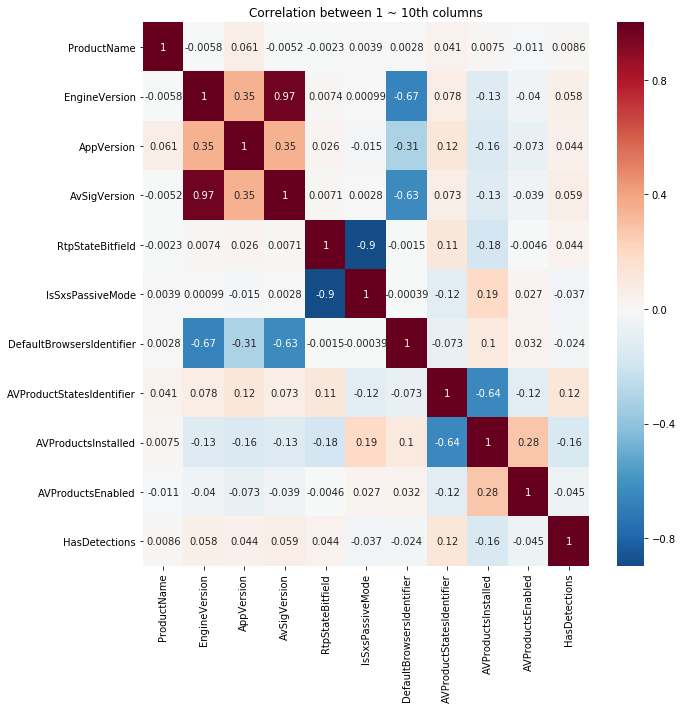

In [25]:
import seaborn as sns

plt.figure(figsize=(10,10))
co_cols = cols[:10]
co_cols.append('HasDetections')
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 1 ~ 10th columns')
plt.show()

There is no columns which have 0.99+ correlation.

In [26]:
corr_remove = []

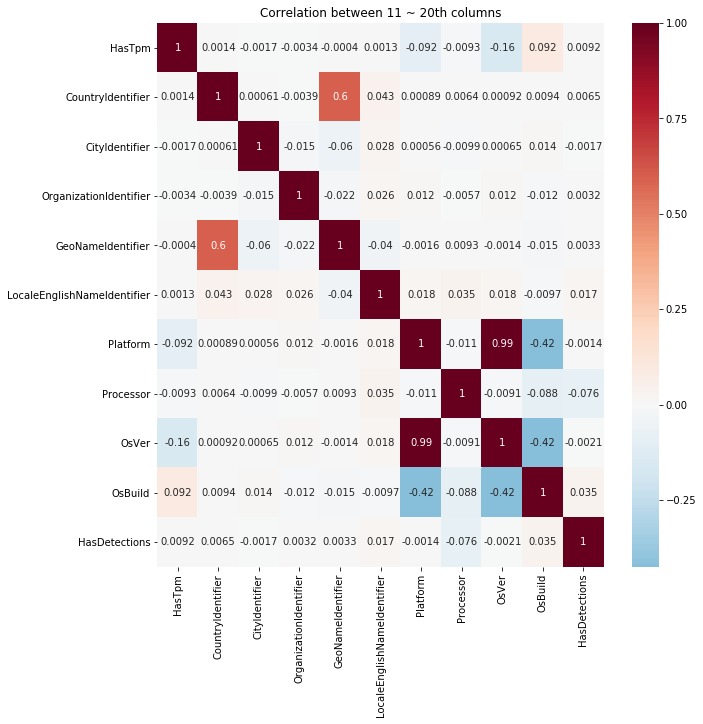

In [27]:
co_cols = cols[10:20]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 11 ~ 20th columns')
plt.show()

Compare and choose the feature which has less unique values.

In [28]:
print(train.Platform.nunique())
print(train.OsVer.nunique())

3
45


* `Platform` vs `OsVer` : remove **`Platform`**

In [29]:
corr_remove.append('Platform')

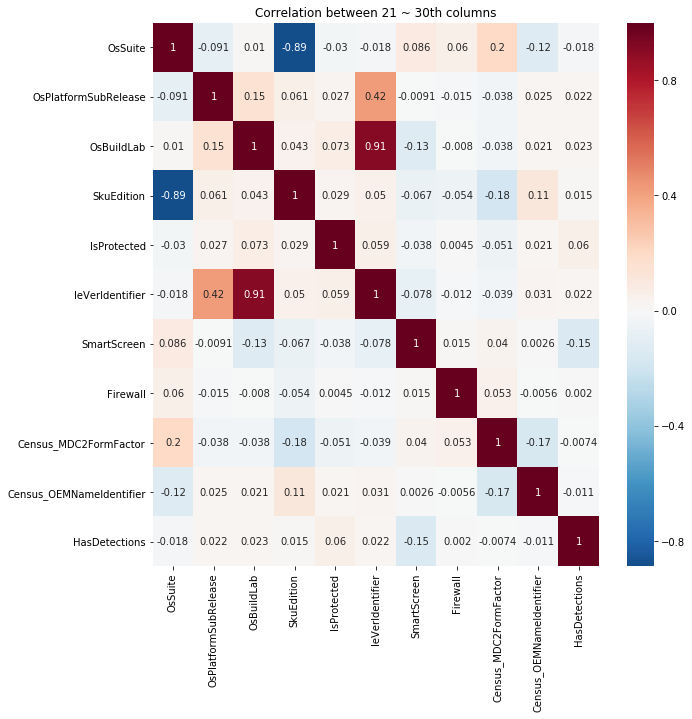

In [30]:
co_cols = cols[20:30]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 21 ~ 30th columns')
plt.show()

No features whose correlation is 0.99+.

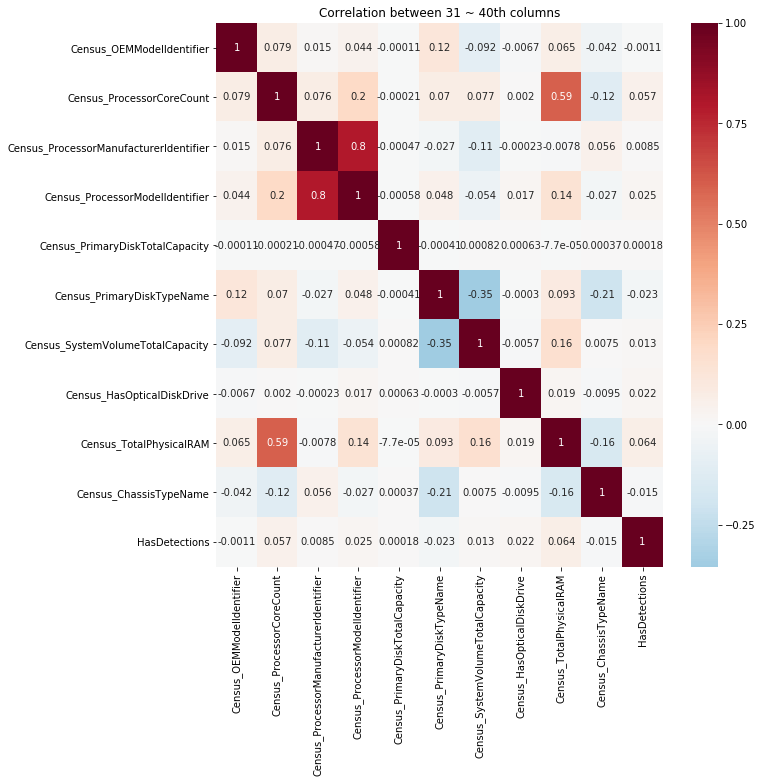

In [31]:
co_cols = cols[30:40]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 31 ~ 40th columns')
plt.show()

Nothing.

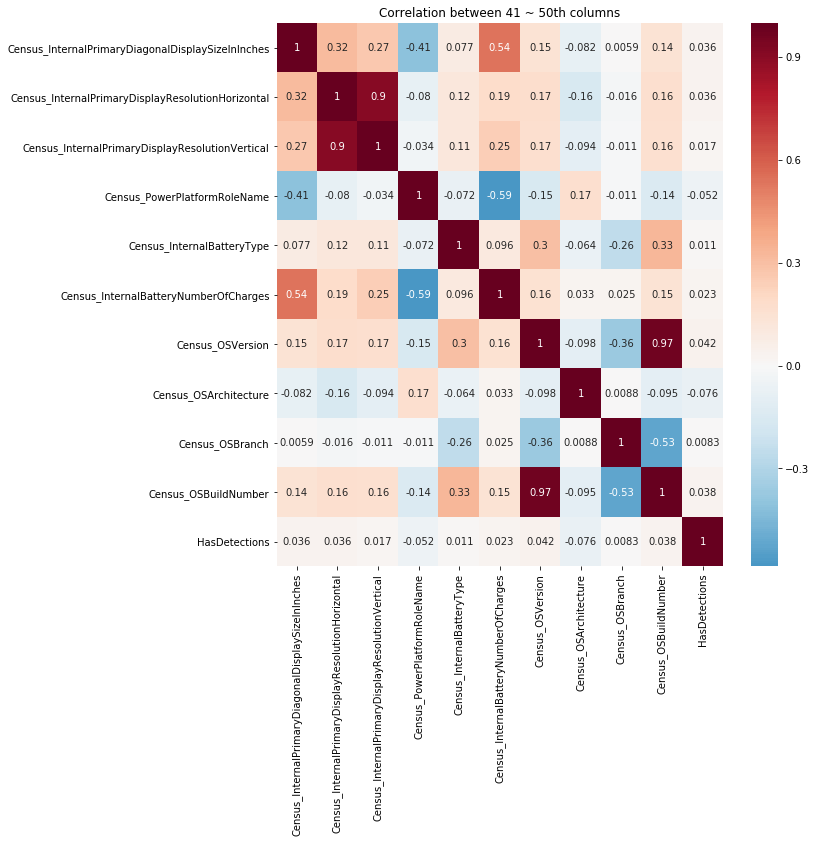

In [32]:
co_cols = cols[40:50]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 41 ~ 50th columns')
plt.show()

Nothing.

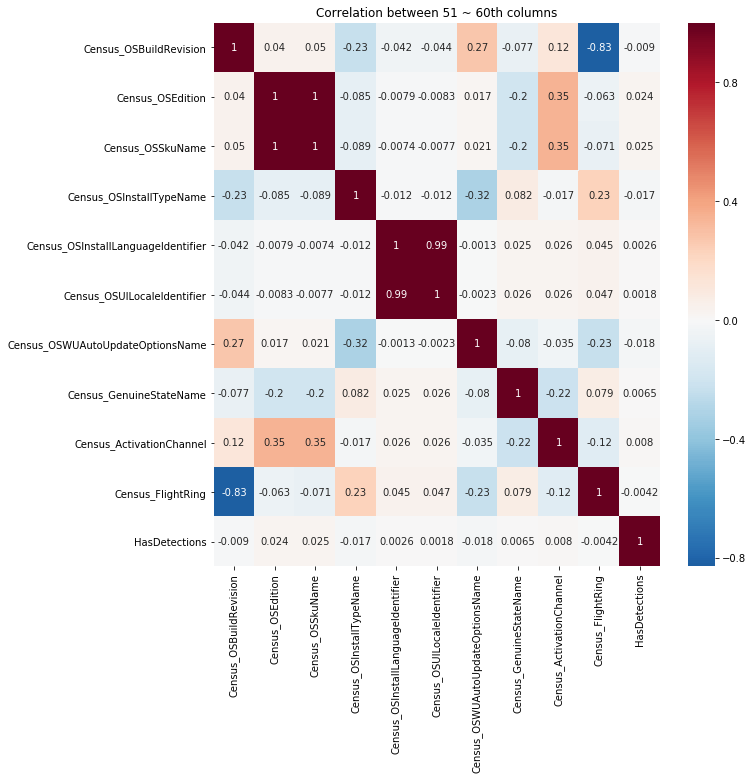

In [33]:
co_cols = cols[50:60]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0)
plt.title('Correlation between 51 ~ 60th columns')
plt.show()

In [34]:
print(train.Census_OSEdition.nunique())
print(train.Census_OSSkuName.nunique(), '\n')
print(train.Census_OSInstallLanguageIdentifier.nunique())
print(train.Census_OSUILocaleIdentifier.nunique())


29
25 

39
144


* `Census_OSEdition` vs `Census_OSSkuName`:  remove **`Census_OSSkuName`**
* `Census_OSInstallLanguageIdentifier` vs `Census_OSUILocaleIdentifier`: remove **`Census_OSInstallLanguageIdentifier`**

In [35]:
corr_remove.append('Census_OSSkuName')
corr_remove.append('Census_OSInstallLanguageIdentifier')

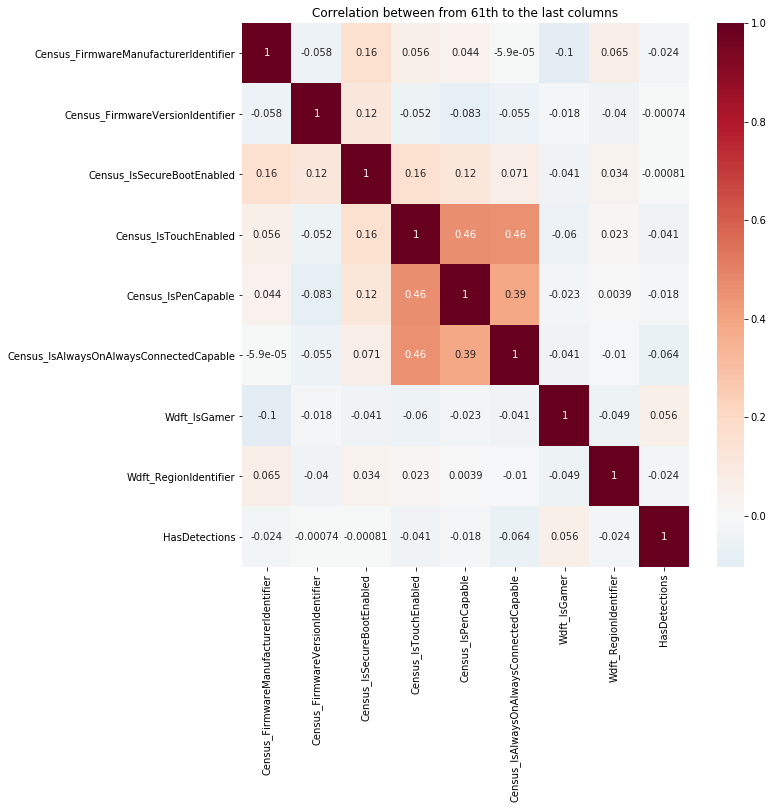

In [36]:
co_cols = cols[60:]
#co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0)
plt.title('Correlation between from 61th to the last columns')
plt.show()

Nothing here.

In [37]:
corr_remove

['Platform', 'Census_OSSkuName', 'Census_OSInstallLanguageIdentifier']

Now we have got 3 columns to remove from correlations of 10-group features.

In [38]:
train.drop(corr_remove, axis=1, inplace=True)

Now, find cross-group correlated features.

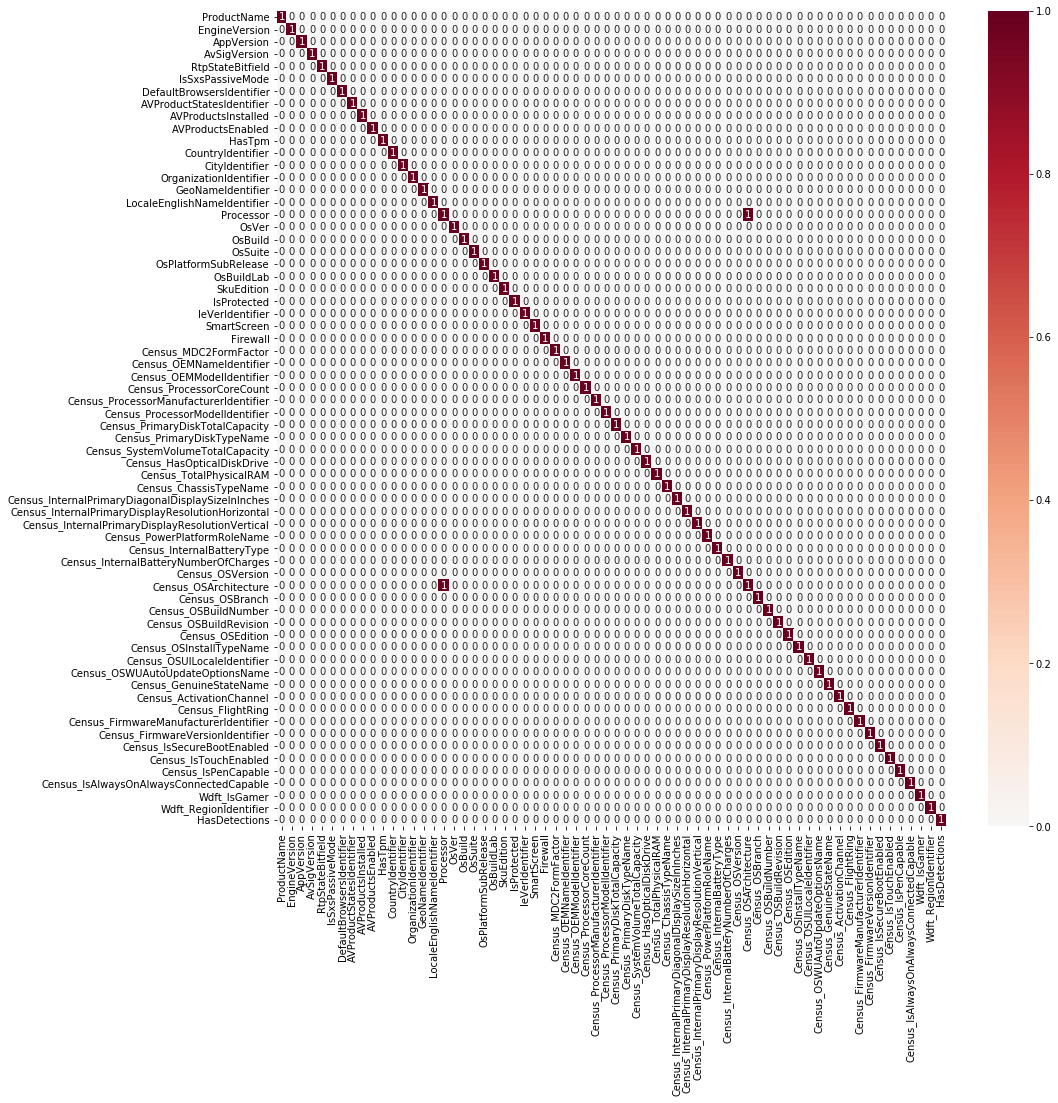

In [39]:
corr = train.corr()
high_corr = (corr >= 0.99).astype('uint8')
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, cmap='RdBu_r', annot=True, center=0.0)
plt.show()


In [40]:
print(train.Census_OSArchitecture.nunique())
print(train.Processor.nunique())

3
3


`Census_OSArchitecture` and `Processor` have the same length of unique values. Then which one? Let's compare their correlation to the `HasDetections`.

In [41]:
train[['Census_OSArchitecture', 'Processor', 'HasDetections']].corr()

,Census_OSArchitecture,Processor,HasDetections
Census_OSArchitecture,1.0000,0.9951,-0.0758
Processor,0.9951,1.0000,-0.0758
HasDetections,-0.0758,-0.0758,1.0000


They seem to be totally same, so anything is OK to remove.

* `Census_OSArchitecture` vs `Processor`: remove **`Processor`**

In [42]:
corr_remove.append('Processor')

In [43]:
droppable_features.extend(corr_remove)
print(len(droppable_features))
droppable_features

17


['Census_ProcessorClass',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'PuaMode',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice',
 'Platform',
 'Census_OSSkuName',
 'Census_OSInstallLanguageIdentifier',
 'Processor']

## 17 columns can be removed at the beginning.